In [1]:
import __init__
import os
import ast  # for safely evaluating string representations of lists
from utils import comp_metrics, get_callbacks
from pathlib import Path
import tensorflow as tf
from data import load_data
from utils import comp_metrics, describe_model_architecture
import numpy as np
import json

In [2]:
version = 'v1'
dir_path = '.'
data_path = str(Path(dir_path) /  'input/stocks_step4.csv')
output_path = str(Path(dir_path) /  f'output/{version}')
model_path = str(Path(output_path) /  'model')

In [3]:
# Daten laden
td, vd = load_data(data_path, window_size=30, only_goog=True)

In [4]:
# Load the saved model
loaded_model = tf.keras.models.load_model(model_path)

In [5]:
# Print layer details
print(json.dumps(describe_model_architecture(loaded_model), indent=2))

[
  {
    "name": "lstm_2",
    "type": "LSTM",
    "units": 64
  },
  {
    "name": "dropout_2",
    "type": "Dropout",
    "dropout_rate": 0.30000000000000004
  },
  {
    "name": "lstm_3",
    "type": "LSTM",
    "units": 32
  },
  {
    "name": "dropout_3",
    "type": "Dropout",
    "dropout_rate": 0.30000000000000004
  },
  {
    "name": "dense_2",
    "type": "Dense",
    "units": 32
  },
  {
    "name": "dense_3",
    "type": "Dense",
    "units": 1
  }
]


Predicting GOOG...
Metrics for GOOG
Mean Absolute Error (MAE): 11.926176071166992
Mean Squared Error (MSE): 248.4564971923828
Accuracy: 98.35%


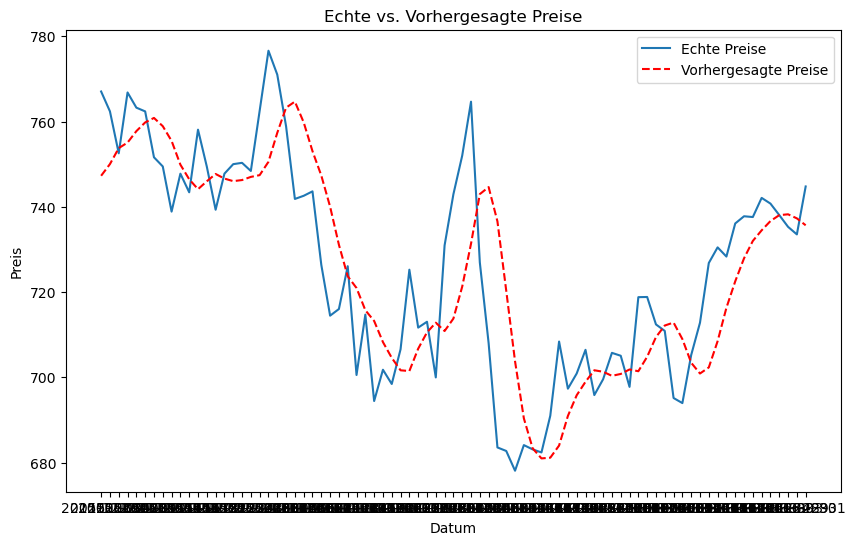

In [6]:
for i in range(len(vd)):
    stock_vd = vd[i]
    scaler = stock_vd['scaler']
    stock_name = stock_vd['stock']
    df = stock_vd['df']
    
    X = []
    y = []
    for i in range(len(stock_vd['val_data'])):
        data = stock_vd['val_data'][i]
        X.append(data[0])
        y.append(data[1])
        
    X = np.array(X)
    y = np.array(y)
    
    print(f'Predicting {stock_name}...')
    y_pred = loaded_model.predict(X)
    print(f'Metrics for {stock_name}')
    comp_metrics(scaler, y, y_pred, df)